<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.467599,33.576212,58.009104,48.671224,0.517588,234.241727,233.602383,0.639344
1,0.0,1.0,68.707329,28.282955,41.937778,71.282227,2.155282,222.365571,219.962876,2.402695
2,0.0,2.0,73.308106,75.152144,42.500237,38.568033,0.001687,239.530206,239.412501,0.117704
3,0.0,3.0,64.897694,49.324909,31.792085,88.241436,-0.324491,243.931633,244.017086,-0.085453
4,0.0,4.0,89.685335,33.356685,99.803392,27.783140,-0.885909,259.742642,260.671965,-0.929323
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.309480,29.011731,45.008482,75.619558,-0.159051,227.790201,228.014656,-0.224455
59996,999.0,56.0,59.514732,80.718626,45.618491,60.390667,1.479323,257.721840,256.549699,1.172141
59997,999.0,57.0,50.910257,97.344643,30.541870,25.415256,-0.408655,213.803371,214.667983,-0.864612
59998,999.0,58.0,47.270588,26.676707,33.128456,22.389405,1.710390,141.175546,139.557136,1.618409


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.467599  33.576212  58.009104  48.671224  0.517588  234.241727   
      1.0    68.707329  28.282955  41.937778  71.282227  2.155282  222.365571   
      2.0    73.308106  75.152144  42.500237  38.568033  0.001687  239.530206   
      3.0    64.897694  49.324909  31.792085  88.241436 -0.324491  243.931633   
      4.0    89.685335  33.356685  99.803392  27.783140 -0.885909  259.742642   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.309480  29.011731  45.008482  75.619558 -0.159051  227.790201   
      56.0   59.514732  80.718626  45.618491  60.390667  1.479323  257.721840   
      57.0   50.910257  97.344643  30.541870  25.415256 -0.408655  213.803371   
      58.0   47.270588  26.676707  33.128456  22.389405  1.710390  141.175546   
      59.0   39.741367  59.072117  51.116403  54.661013 -0.017651  214.573248   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    233.602383  0.639344  
      1.0    219.962876  2.402695  
      2.0    239.412501  0.117704  
      3.0    244.017086 -0.085453  
      4.0    260.671965 -0.929323  
...                 ...       ...  
999.0 55.0   228.014656 -0.224455  
      56.0   256.549699  1.172141  
      57.0   214.667983 -0.864612  
      58.0   139.557136  1.618409  
      59.0   214.782796 -0.209548  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.467599  33.576212  58.009104  48.671224  0.517588  234.241727   
      1.0    68.707329  28.282955  41.937778  71.282227  2.155282  222.365571   
      2.0    73.308106  75.152144  42.500237  38.568033  0.001687  239.530206   
      3.0    64.897694  49.324909  31.792085  88.241436 -0.324491  243.931633   
      4.0    89.685335  33.356685  99.803392  27.783140 -0.885909  259.742642   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.309480  29.011731  45.008482  75.619558 -0.159051  227.790201   
      56.0   59.514732  80.718626  45.618491  60.390667  1.479323  257.721840   
      57.0   50.910257  97.344643  30.541870  25.415256 -0.408655  213.803371   
      58.0   47.270588  26.676707  33.128456  22.389405  1.710390  141.175546   
      59.0   39.741367  59.072117  51.116403  54.661013 -0.017651  214.573248   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    233.602383  0.639344  
      1.0    219.962876  2.402695  
      2.0    239.412501  0.117704  
      3.0    244.017086 -0.085453  
      4.0    260.671965 -0.929323  
...                 ...       ...  
999.0 55.0   228.014656 -0.224455  
      56.0   256.549699  1.172141  
      57.0   214.667983 -0.864612  
      58.0   139.557136  1.618409  
      59.0   214.782796 -0.209548  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.467599,33.576212,58.009104,48.671224,0.517588,234.241727,233.602383,0.639344
1,0.0,1.0,68.707329,28.282955,41.937778,71.282227,2.155282,222.365571,219.962876,2.402695
2,0.0,2.0,73.308106,75.152144,42.500237,38.568033,0.001687,239.530206,239.412501,0.117704
3,0.0,3.0,64.897694,49.324909,31.792085,88.241436,-0.324491,243.931633,244.017086,-0.085453
4,0.0,4.0,89.685335,33.356685,99.803392,27.783140,-0.885909,259.742642,260.671965,-0.929323
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.309480,29.011731,45.008482,75.619558,-0.159051,227.790201,228.014656,-0.224455
59996,999.0,56.0,59.514732,80.718626,45.618491,60.390667,1.479323,257.721840,256.549699,1.172141
59997,999.0,57.0,50.910257,97.344643,30.541870,25.415256,-0.408655,213.803371,214.667983,-0.864612
59998,999.0,58.0,47.270588,26.676707,33.128456,22.389405,1.710390,141.175546,139.557136,1.618409


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.467599  33.576212  58.009104  48.671224  0.517588  234.241727   
      1.0    68.707329  28.282955  41.937778  71.282227  2.155282  222.365571   
      2.0    73.308106  75.152144  42.500237  38.568033  0.001687  239.530206   
      3.0    64.897694  49.324909  31.792085  88.241436 -0.324491  243.931633   
      4.0    89.685335  33.356685  99.803392  27.783140 -0.885909  259.742642   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   68.309480  29.011731  45.008482  75.619558 -0.159051  227.790201   
      56.0   59.514732  80.718626  45.618491  60.390667  1.479323  257.721840   
      57.0   50.910257  97.344643  30.541870  25.415256 -0.408655  213.803371   
      58.0   47.270588  26.676707  33.128456  22.389405  1.710390  141.175546   
      59.0   39.741367  59.072117  51.116403  54.661013 -0.017651  214.573248   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    233.602383  0.639344  
      1.0    219.962876  2.402695  
      2.0    239.412501  0.117704  
      3.0    244.017086 -0.085453  
      4.0    260.671965 -0.929323  
...                 ...       ...  
999.0 55.0   228.014656 -0.224455  
      56.0   256.549699  1.172141  
      57.0   214.667983 -0.864612  
      58.0   139.557136  1.618409  
      59.0   214.782796 -0.209548  

[60000 rows x 8 columns]

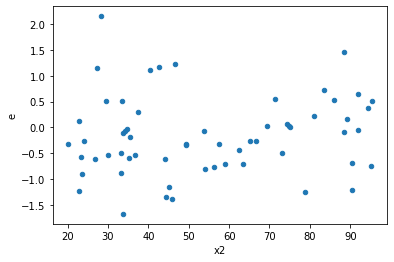

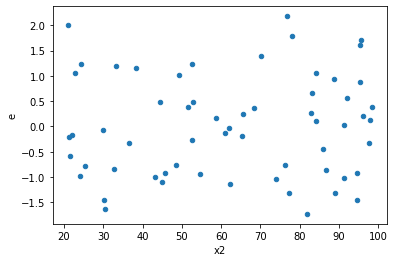

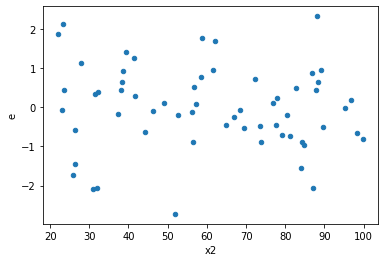

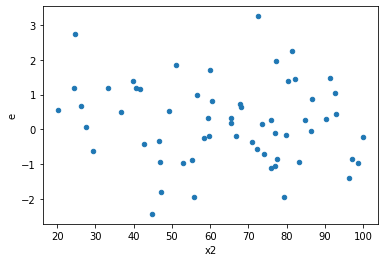

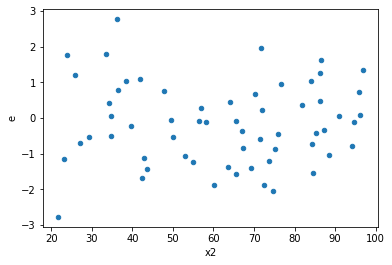

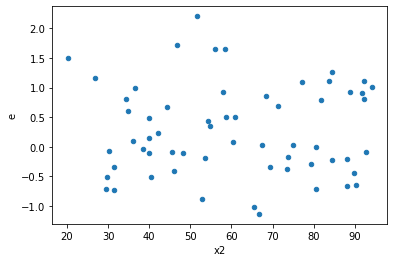

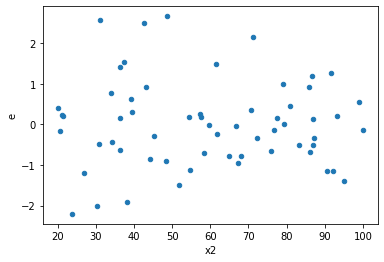

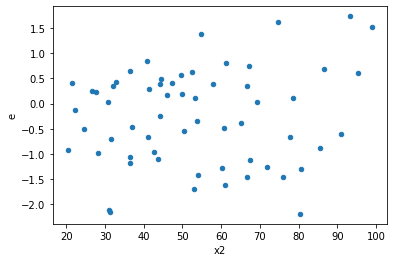

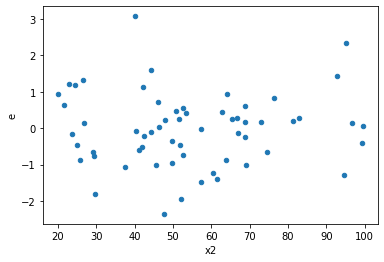

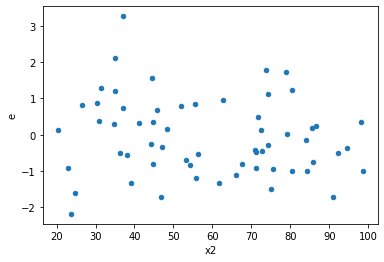

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,28.0,28.0,16131.063053942944,17476.954142036186,576.1093947836765,624.1769336441495,1.0834347422480792,0.8335828473171802,0.5832085763414099,0.4167914236585901,Reject001=1 : Homoscedasticity
1.0,21.0,35.0,8325.954129178555,18143.401551668754,396.4740061513598,518.3829014762501,1.3074826935270754,0.47158075866937543,0.7642096206653123,0.23579037933468772,Reject001=1 : Homoscedasticity
4.0,34.0,22.0,16813.81229443109,16467.76400566912,494.5238910126791,748.5347275304146,1.5136472496759978,0.3101279927632108,0.8449360036183946,0.1550639963816054,Reject001=1 : Homoscedasticity
5.0,26.0,30.0,11487.863524125809,23147.7026822822,441.8409047740696,771.5900894094067,1.7463075081379136,0.14223027835040702,0.9288848608247965,0.07111513917520351,Reject001=1 : Homoscedasticity
6.0,31.0,25.0,17926.818348586326,15396.500360156291,578.2844628576235,615.8600144062516,1.0649776259990569,0.8805448259750057,0.5597275870124971,0.44027241298750286,Reject001=1 : Homoscedasticity
8.0,39.0,17.0,15639.622725501418,11076.64712168971,401.0159673205492,651.5674777464535,1.6247918557956766,0.2821923872734138,0.8589038063632931,0.1410961936367069,Reject001=1 : Homoscedasticity
14.0,20.0,36.0,7268.313499096952,22777.31079702484,363.4156749548476,632.7030776951344,1.7409900598639405,0.14446041565372125,0.9277697921731394,0.07223020782686063,Reject001=1 : Homoscedasticity
17.0,30.0,26.0,12200.733259631526,12816.078682565227,406.6911086543842,492.92610317558564,1.212040520891953,0.62244966644238,0.68877516677881,0.31122483322119,Reject001=1 : Homoscedasticity
20.0,22.0,34.0,13156.213914224702,21733.408363751936,598.0097233738501,639.2178930515275,1.068908862292722,0.8423987024310495,0.5788006487844752,0.42119935121552476,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,28.0,16131.063053942944,17476.954142036186,576.1093947836765,624.1769336441495,1.0834347422480792,0.8335828473171802,Reject001=1 : Homoscedasticity
1.0,21.0,35.0,8325.954129178555,18143.401551668754,396.4740061513598,518.3829014762501,1.3074826935270754,0.47158075866937543,Reject001=1 : Homoscedasticity
2.0,28.0,28.0,15982.100422751877,13258.097570080727,570.789300812567,473.50348464574023,0.8295591455054743,0.6243877584693607,Reject001=1 : Homoscedasticity
3.0,41.0,15.0,21574.647373820197,5392.763642671274,526.2109115565902,359.51757617808494,0.6832195385583931,0.3297360338052428,Reject001=1 : Homoscedasticity
4.0,34.0,22.0,16813.81229443109,16467.76400566912,494.5238910126791,748.5347275304146,1.5136472496759978,0.3101279927632108,Reject001=1 : Homoscedasticity
5.0,26.0,30.0,11487.863524125809,23147.7026822822,441.8409047740696,771.5900894094067,1.7463075081379136,0.14223027835040702,Reject001=1 : Homoscedasticity
6.0,31.0,25.0,17926.818348586326,15396.500360156291,578.2844628576235,615.8600144062516,1.0649776259990569,0.8805448259750057,Reject001=1 : Homoscedasticity
7.0,22.0,34.0,15746.608508659105,15473.922701960568,715.7549322117775,455.1153735870755,0.6358536324447095,0.26743077998658327,Reject001=1 : Homoscedasticity
8.0,39.0,17.0,15639.622725501418,11076.64712168971,401.0159673205492,651.5674777464535,1.6247918557956766,0.2821923872734138,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      993
Reject001=0 : Heteroscedasticity      7
Name: Result_test, dtype: int64